In [1]:
import glob as g
import matplotlib.pyplot as plt
import numpy as np
import sarracen

/users/labnet/st2/sohomg/phantom/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/sohomg/phantom/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/lab

In [2]:
import h5py
import pandas as pd

In [4]:
file = sorted(g.glob('*.hdf5'))
print(file)

[]


Keys: <KeysViewHDF5 ['Header', 'PartType0']>
[0.71100354 0.71100354 0.71100354 ... 0.71100354 0.71100354 0.71100354]
[0.10153126 0.10153126 0.10153126 ... 0.10153126 0.10153126 0.10153126]


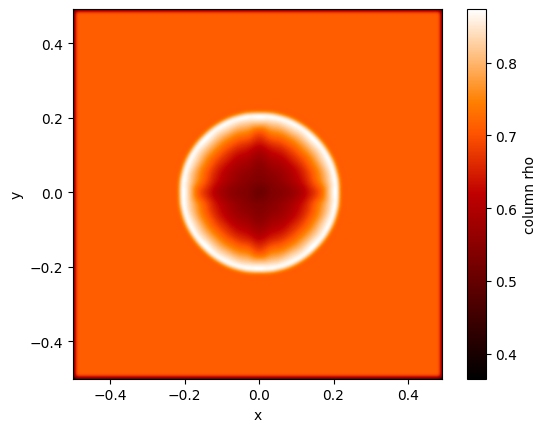

In [20]:
with h5py.File(file[6], "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[1]


    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    datac = list(f[a_group_key]['Coordinates'])
    datad = np.array(f[a_group_key]['Density'])
    datae = np.array(f[a_group_key]['SmoothingLength'])
    dataf = np.array(f[a_group_key]['Masses'])
    datag = np.array(f[a_group_key]['InternalEnergy'])
    
    
    x = np.array([row[0] for row in datac])
    y = np.array([row[1] for row in datac])
    z = np.array([row[2] for row in datac])
    
    data = {'x': x-0.5, 'y': y-0.5, 'z': z-0.5, 'h': datae, 'rho': datad, 'm': dataf, 'u':datag}
    params = {'hfact': 1.2}
    sdf = sarracen.SarracenDataFrame(data, params)
    sdf.to_csv('snap5.csv', sep=',')

    sdf.render('rho')
    
    print(datad)
    print(datag)
    
#     r = np.sqrt((x-0.5)**2+(y-0.5)**2+(z-0.5)**2)
    
#     fig, ax = plt.subplots(figsize=(14,14))
    
#     ax.scatter(x,y, s=1.0)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_title('x-y coordinates')
#     fig.savefig('blast.png')
#     #ax.colorbar()
#     #ax.rcParams["figure.figsize"] = (10,10)
#     #fig.show()
#     fig.savefig('sedov_v5.png')
    
    
    
   #count = [1 for i in range(0,len(x)) if y[i]<0.01]
   #print(sum(count))



In [39]:
print(file[0])
f = h5py.File(file[0], "r")
for key in f.keys():

    print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
    print(type(f[key])) # get the object type: usually group or dataset
    
# key = f.keys()

#print(key[0])
    
print(f['Header'])

group = f[key]

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)
    
with h5py.File(file[0], "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[1]


    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    datac = list(f[a_group_key]['Coordinates'])
    datad = list(f[a_group_key]['InternalEnergy'])



sedov_ics.hdf5
Header
<class 'h5py._hl.group.Group'>
PartType0
<class 'h5py._hl.group.Group'>
<HDF5 group "/Header" (0 members)>
Coordinates
Density
InternalEnergy
Masses
ParticleIDs
SmoothingLength
Velocities
Keys: <KeysViewHDF5 ['Header', 'PartType0']>


In [5]:
sdf = sarracen.read_phantom('sedov_00000')
sdf.calc_density()
sdf.describe()

,iorig,x,y,z,vx,vy,vz,u,h,alpha,divv,dt,rho
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.0,262144.0,262144.0,262144.000000,262144.000000,262144.000000,262144.0,262144.000000,262144.000000
mean,131072.500000,0.507812,0.507812,0.507812,0.0,0.0,0.0,1.000000,0.018745,0.001348,0.0,0.002988,1.000825
std,75674.598821,0.288640,0.288640,0.288640,0.0,0.0,0.0,48.496375,0.000000,0.036305,0.0,0.000180,0.000000
min,1.000000,0.015625,0.015625,0.015625,0.0,0.0,0.0,0.000000,0.018745,0.000000,-0.0,0.000047,1.000825
25%,65536.750000,0.261719,0.261719,0.261719,0.0,0.0,0.0,0.000000,0.018745,0.000000,-0.0,0.003000,1.000825
50%,131072.500000,0.507812,0.507812,0.507812,0.0,0.0,0.0,0.000000,0.018745,0.000000,-0.0,0.003000,1.000825
75%,196608.250000,0.753906,0.753906,0.753906,0.0,0.0,0.0,0.000000,0.018745,0.000000,0.0,0.003000,1.000825
max,262144.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,6037.186807,0.018745,1.000000,-0.0,0.003000,1.000825


In [10]:
coord = pd.concat([sdf['x'], sdf['y'], sdf['z']], axis=1)
rho = sdf['rho']
ie = sdf['u']
m = [3.81469e-6]*len(sdf['x'])*2
id = [i for i in range(0,len(sdf['x']))]
h = sdf['h']
v = pd.concat([sdf['vx'], sdf['vy'], sdf['vz']], axis=1)
data = {'Coordinates': coord, 'Density': rho, 'InternalEnergy': ie, 'Masses': m, 'ParticleIDs': id, 'SmoothingLength': h, 'Velocities': v}
print(coord)
print(len(m))

               x         y         z
0       0.015625  0.015625  0.015625
1       0.031250  0.015625  0.015625
2       0.046875  0.015625  0.015625
3       0.062500  0.015625  0.015625
4       0.078125  0.015625  0.015625
...          ...       ...       ...
262139  0.937500  1.000000  1.000000
262140  0.953125  1.000000  1.000000
262141  0.968750  1.000000  1.000000
262142  0.984375  1.000000  1.000000
262143  1.000000  1.000000  1.000000

[262144 rows x 3 columns]
524288


In [11]:
hf = h5py.File('sedov_ics64a_twicemass.hdf5', 'w')
dict_group2 = hf.create_group('Header')
dict_group = hf.create_group('PartType0')
for k, v in data.items():
    dict_group[k] = v
    
hf['Header'].attrs['BoxSize'] = 1
hf['Header'].attrs['Flag_Cooling'] = 0
hf['Header'].attrs['Flag_DoublePrecision'] = 0
hf['Header'].attrs['Flag_Feedback'] = 0
hf['Header'].attrs['Flag_IC_info'] = 0
hf['Header'].attrs['Flag_Metals'] = 0
hf['Header'].attrs['Flag_Sfr'] = 0
hf['Header'].attrs['HubbleParam'] = 1
hf['Header'].attrs['MassTable'] = [0,0,0,0,0,0]
hf['Header'].attrs['NumFilesPerSnapshot'] = 1
hf['Header'].attrs['NumPart_ThisFile'] = [262144,0,0,0,0,0]
hf['Header'].attrs['NumPart_Total'] = [262144,0,0,0,0,0]
hf['Header'].attrs['NumPart_Total_HighWord'] = [0,0,0,0,0,0]
hf['Header'].attrs['Omega0'] = 0
hf['Header'].attrs['OmegaLambda'] = 0
hf['Header'].attrs['Redshift'] = 0
hf['Header'].attrs['Time'] = 0
hf.close()

In [12]:
with h5py.File('sedov_ics64a.hdf5', "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    
    group = f['PartType0']
    
    for key in group.keys():
        print(key)

Keys: <KeysViewHDF5 ['Header', 'PartType0']>
Coordinates
Density
InternalEnergy
Masses
ParticleIDs
SmoothingLength
Velocities


In [14]:
with h5py.File(file[3], "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    #print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[1]


    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    xyz = list(f[a_group_key]['Coordinates'])
    rho = np.array(f[a_group_key]['Density'])
    h = np.array(f[a_group_key]['SmoothingLength'])
    m = np.array(f[a_group_key]['Masses'])
    
    
    x = np.array([row[0] for row in xyz])
    y = np.array([row[1] for row in xyz])
    z = np.array([row[2] for row in xyz])
    
#     data = {'x': x, 'y': y, 'z': z, 'h': datae, 'rho': datad, 'm': dataf}
#     params = {'hfact': 1.2}
#     sdf = sarracen.SarracenDataFrame(data, params)
    
#     sdf.render('rho', xsec=0.5)


    
    r = np.sqrt((x-0.5)**2+(y-0.5)**2+(z-0.5)**2)
    
#     fig, ax = plt.subplots(figsize=(14,14))
    
#     ax.scatter(r,rho, s=1.0)
#     ax.set_xlabel('r')
#     ax.set_ylabel('rho')
#     ax.set_title('radius vs density')

#     sdf = sarracen.read_phantom('sedov_00002')
#     sdf.calc_density()
#     rp = np.sqrt((sdf['x']-0.5)**2+(sdf['y']-0.5)**2+(sdf['z']-0.5)**2)
#     rhop = sdf['rho']
#     data = {'r': rp, 'density': rhop}
#     df = pd.DataFrame(data)
#     df.to_csv('splash.defaults', sep='\1')
#     ax.scatter(rp,rhop, s=1.0)
#     fig.savefig('sidebyside2.png')

[[ 1.         -0.06067025]
 [-0.06067025  1.        ]]


<Axes: xlabel='x', ylabel='y'>

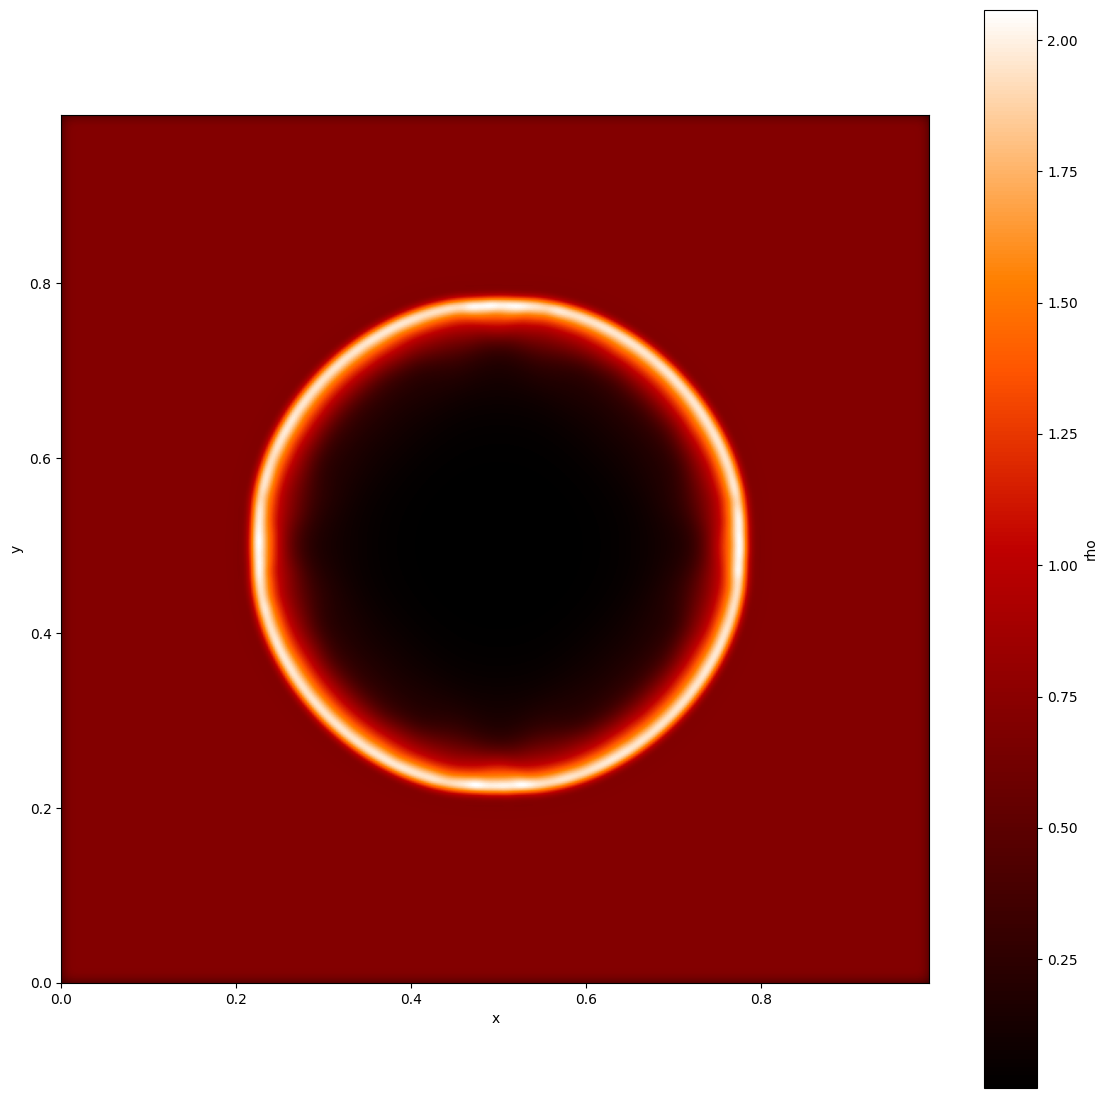

In [6]:
fig, ax = plt.subplots(figsize=(14,14))

data = {'x': x, 'y': y, 'z': z, 'h': h, 'rho': rho, 'm': m}
params = {'hfact': 1.2}
sdfnew = sarracen.SarracenDataFrame(data, params)
    
sdfnew.render('rho', xsec=0.5)


Text(0.5, 1.0, 'x-y coordinates')

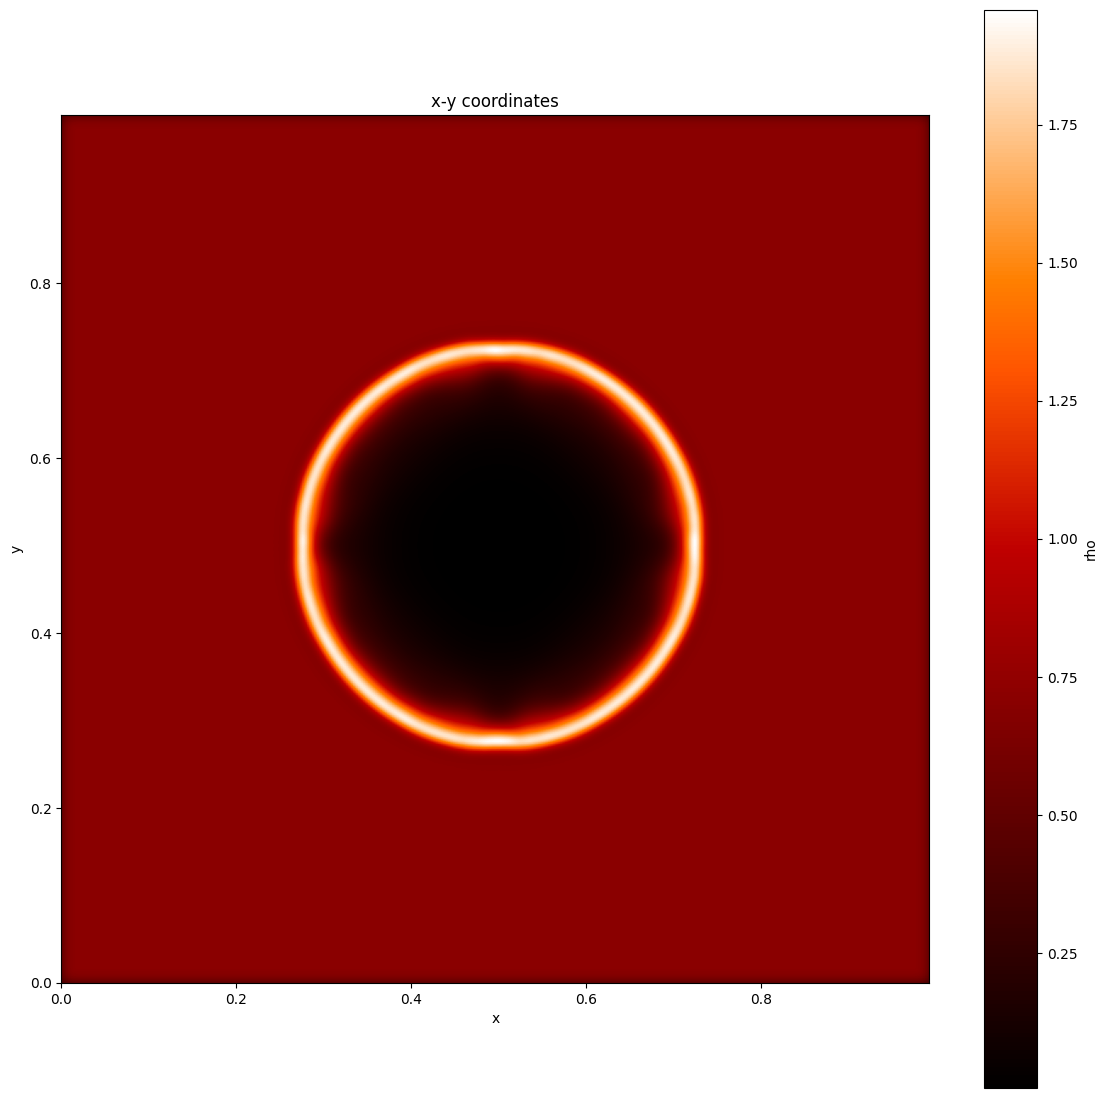

In [35]:
fig, ax = plt.subplots(figsize=(14,14))
    
ax = sdf.render('rho', xsec=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('x-y coordinates')

SyntaxError: invalid syntax (332235697.py, line 1)